In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="fUVNuQI7uky4LpsrUd2z")
project = rf.workspace("yomna-hupf9").project("car-jcznw")
dataset = project.version(2).download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 791.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to car-2 in yolov8:: 100%|██████████| 12710/12710 [00:03<00:00, 4197.92it/s]


In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 701.1/701.1 kB 4.0 MB/s eta 0:00:00


In [3]:
%cd /content/drive/MyDrive/damage_segmentation_yolo

/content/drive/MyDrive/damage_segmentation_yolo


In [4]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.3 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.8/78.2 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image


# **Training**

In [6]:
!yolo task=segment mode=train model=yolov8s-seg.pt data=/content/car-2/data.yaml epochs=50 imgsz=640

100% 22.8M/22.8M [00:00<00:00, 123MB/s] 
Ultralytics YOLOv8.1.3 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/car-2/data.yaml, epochs=50, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fals

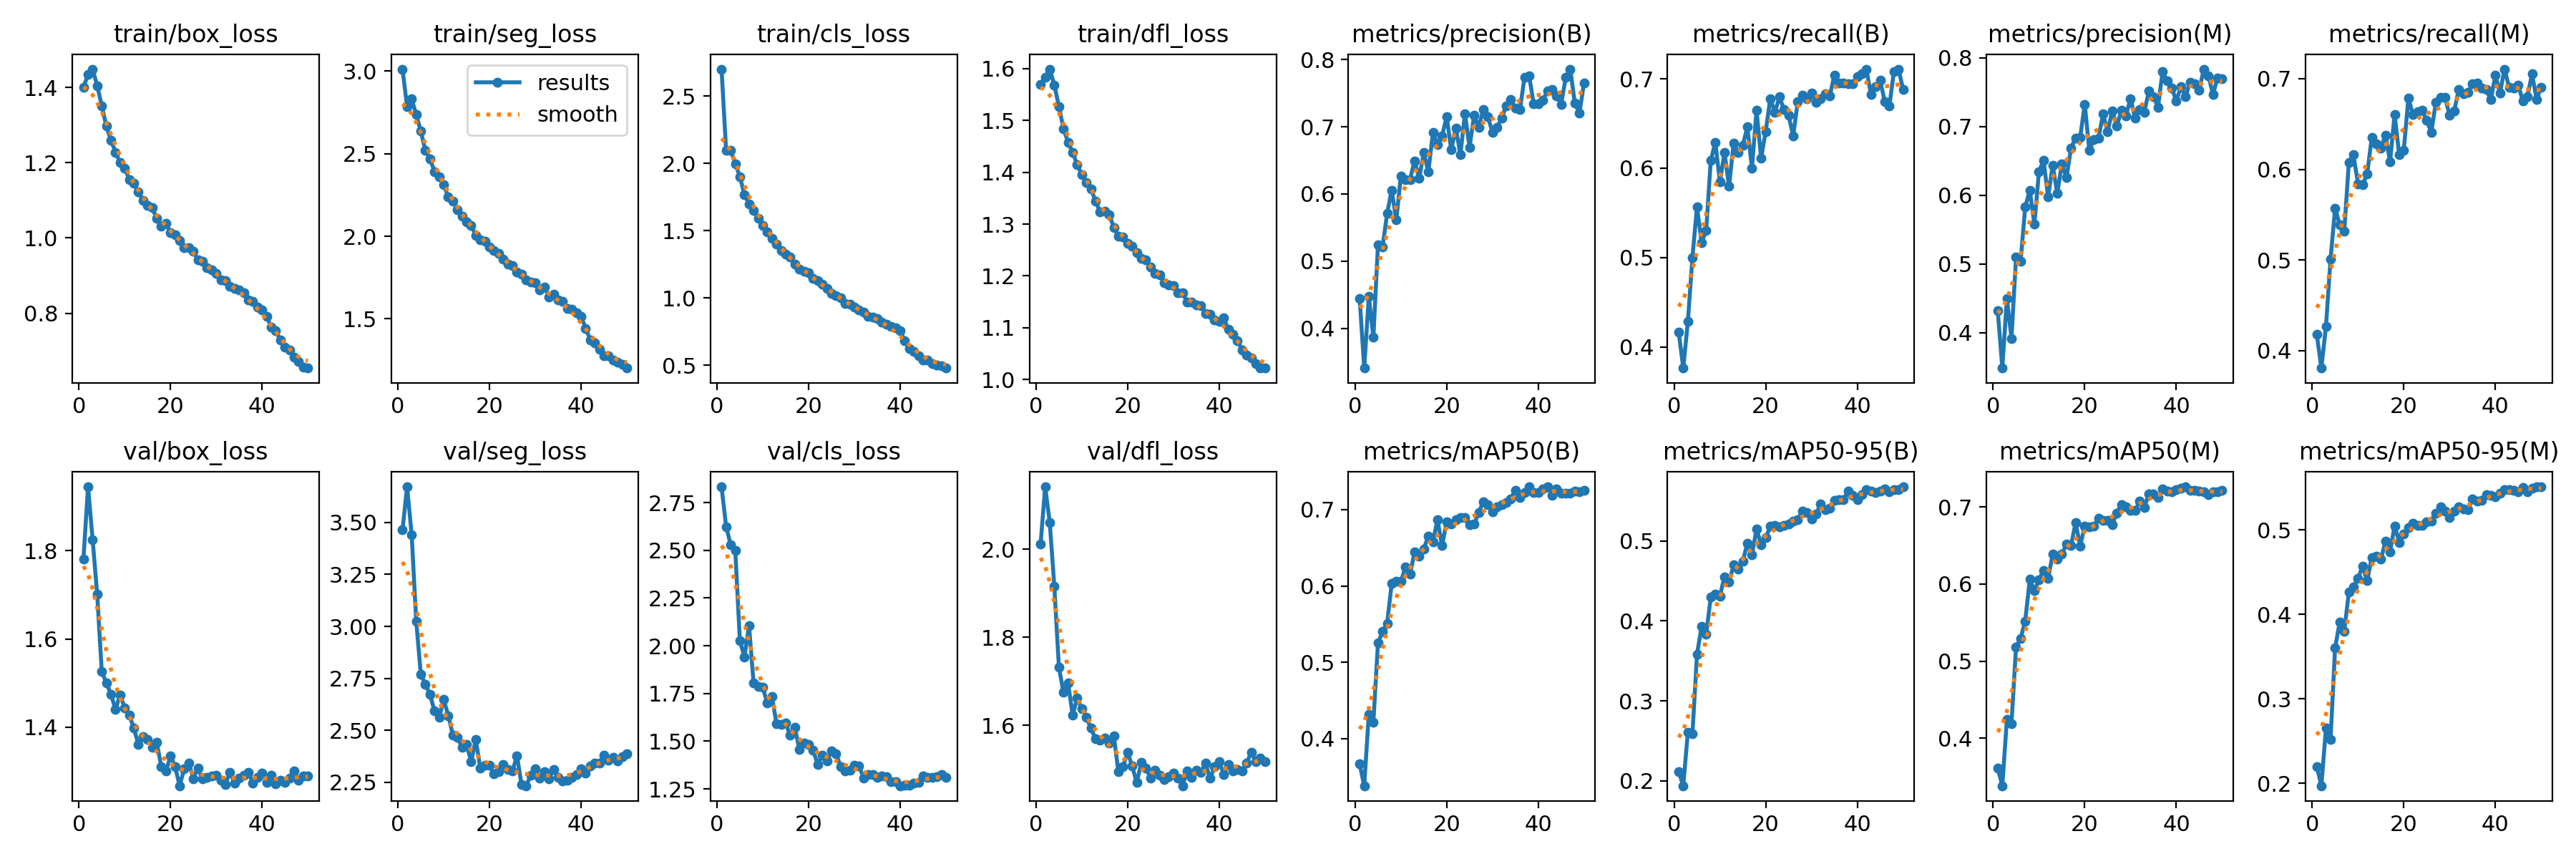

In [8]:
Image(filename='/content/drive/MyDrive/damage_segmentation_yolo/runs/segment/train/results.png', width=600)

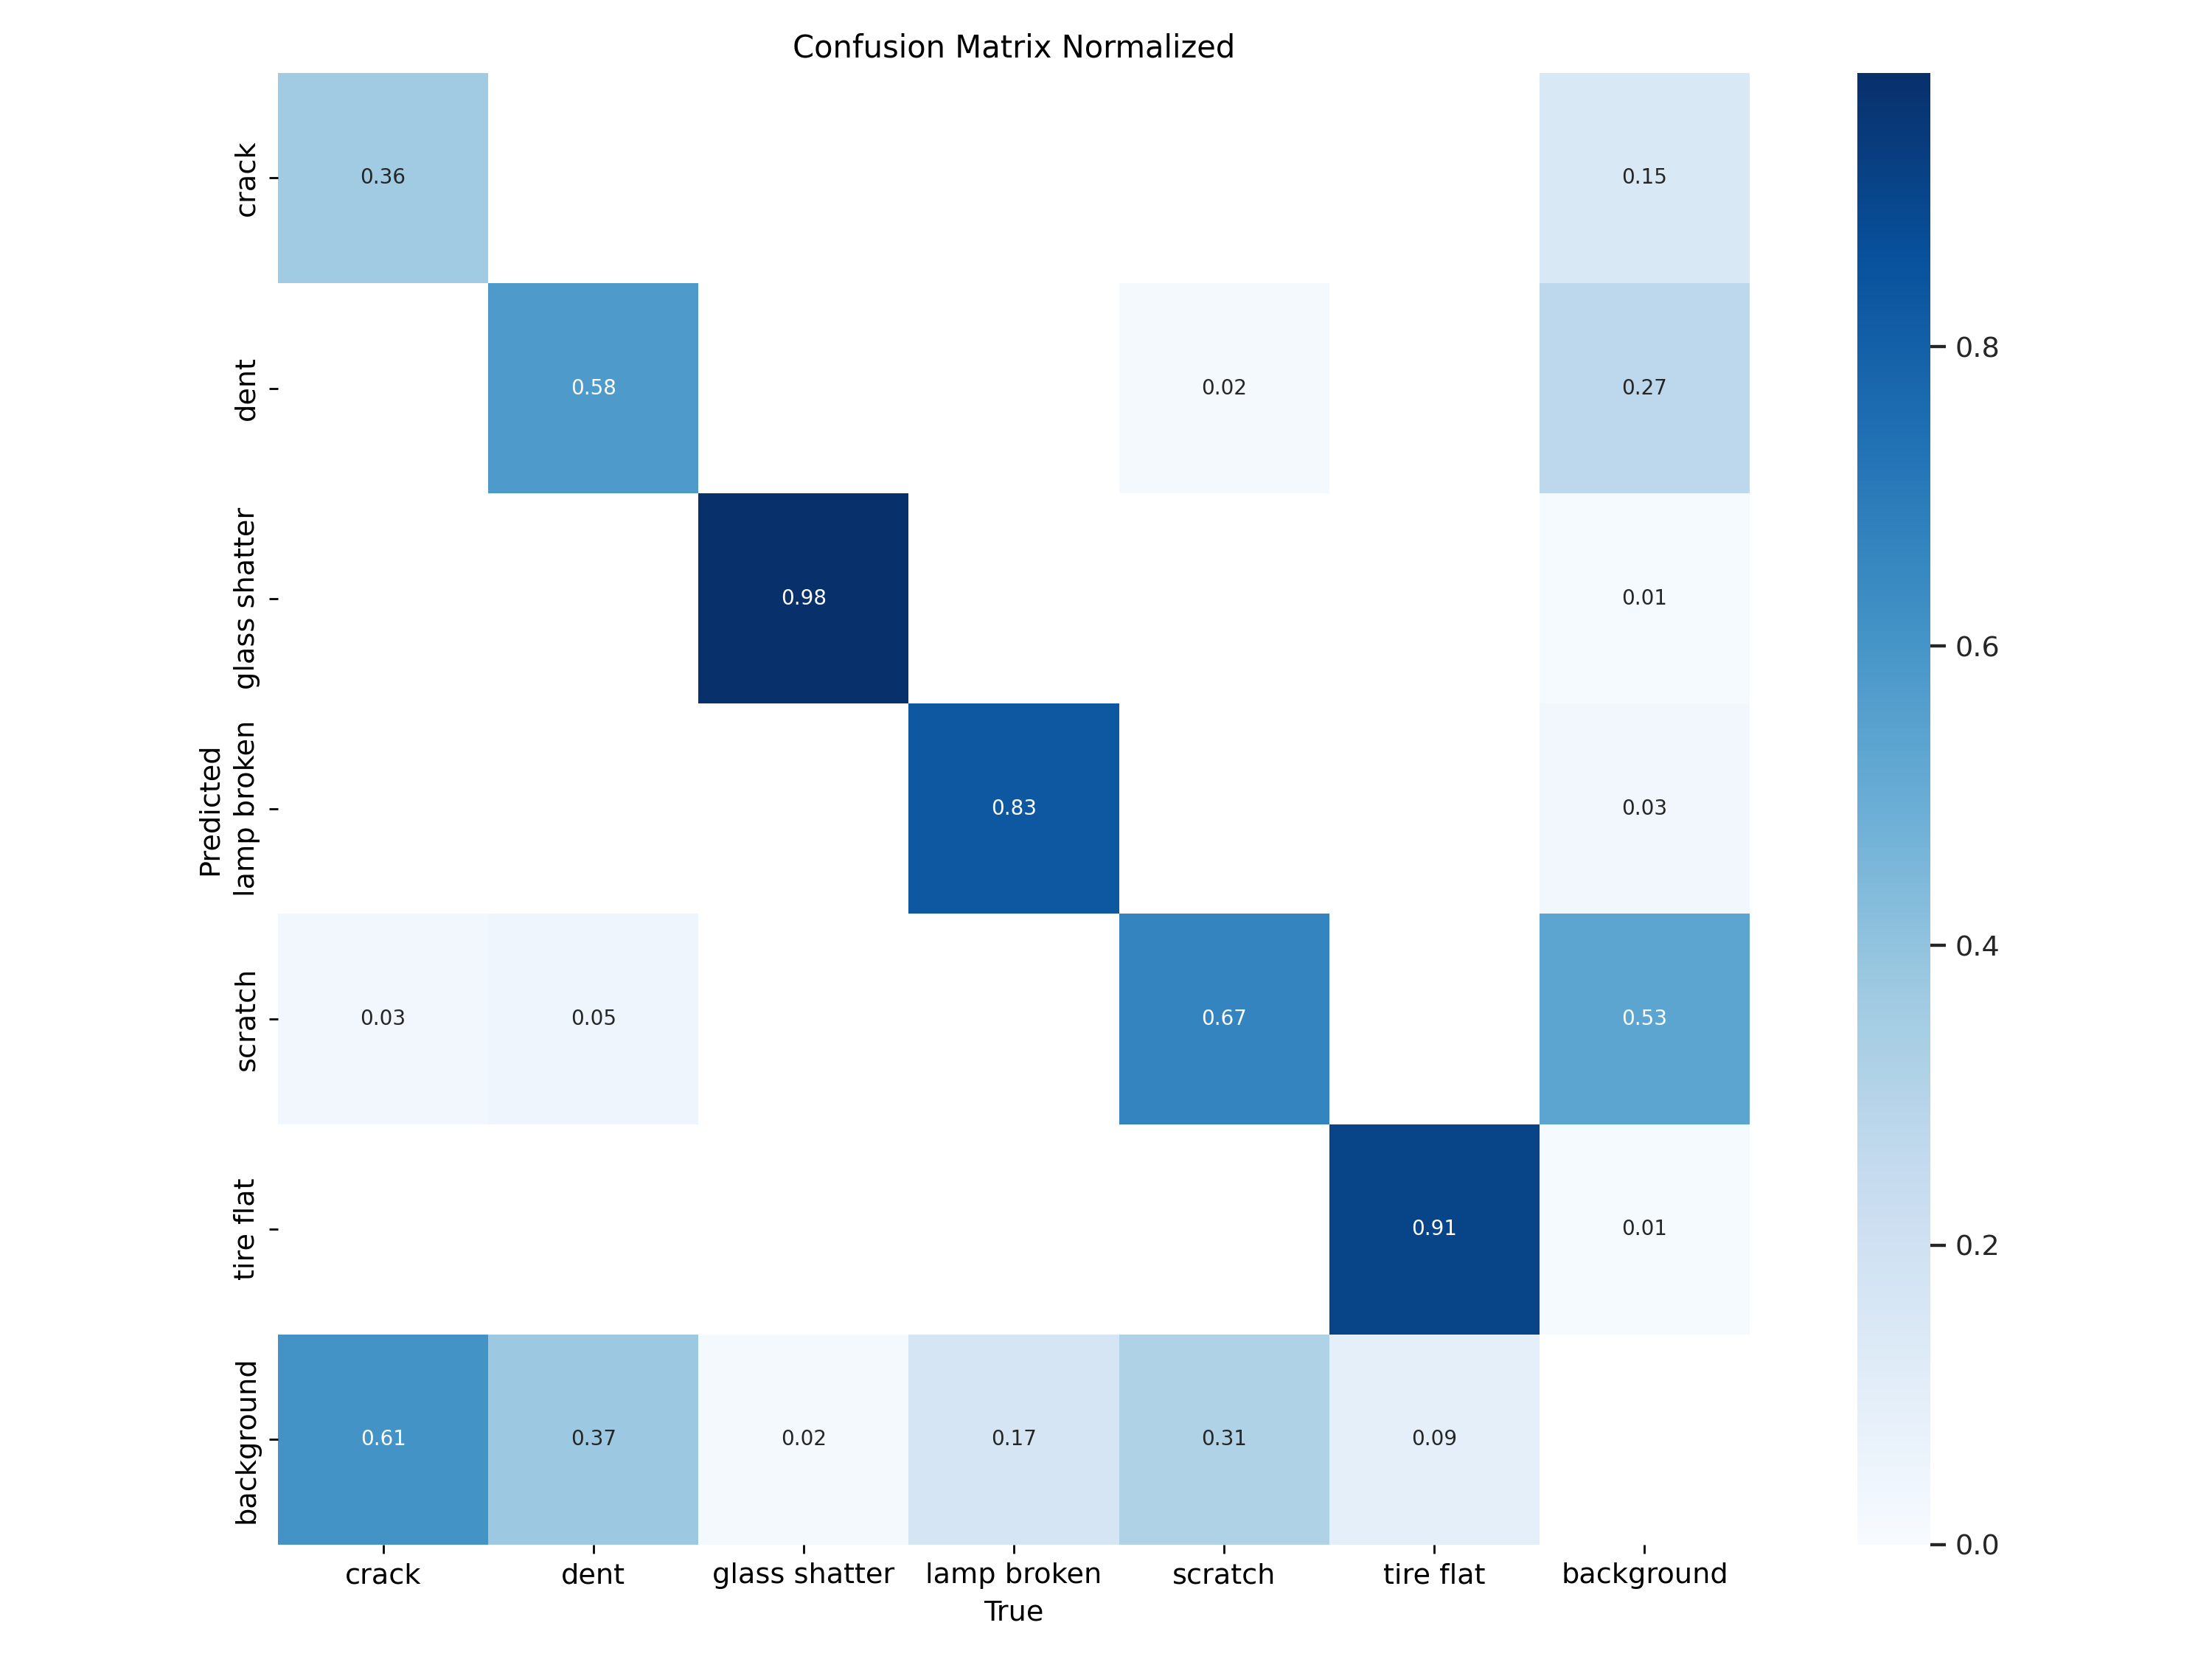

In [9]:
Image(filename='/content/drive/MyDrive/damage_segmentation_yolo/runs/segment/train/confusion_matrix_normalized.png', width=600)

# **Validation**

In [7]:
!yolo task=segment mode=val model=/content/drive/MyDrive/damage_segmentation_yolo/runs/segment/train/weights/best.pt data=/content/car-2/data.yaml

Ultralytics YOLOv8.1.3 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11781922 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/car-2/valid/labels.cache... 745 images, 0 backgrounds, 0 corrupt: 100% 745/745 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 47/47 [00:20<00:00,  2.35it/s]
                   all        745       1609      0.767      0.687      0.726      0.568      0.768      0.687       0.72       0.55
                 crack        745        168      0.529      0.339      0.325      0.167      0.533      0.339      0.327      0.117
                  dent        745        475      0.682      0.516      0.575      0.321      0.683      0.514      0.554      0.287
         glass shatter        745        116       0.96      0.983      0.991       0.92       0.96      0.983      0.991      0.919
      

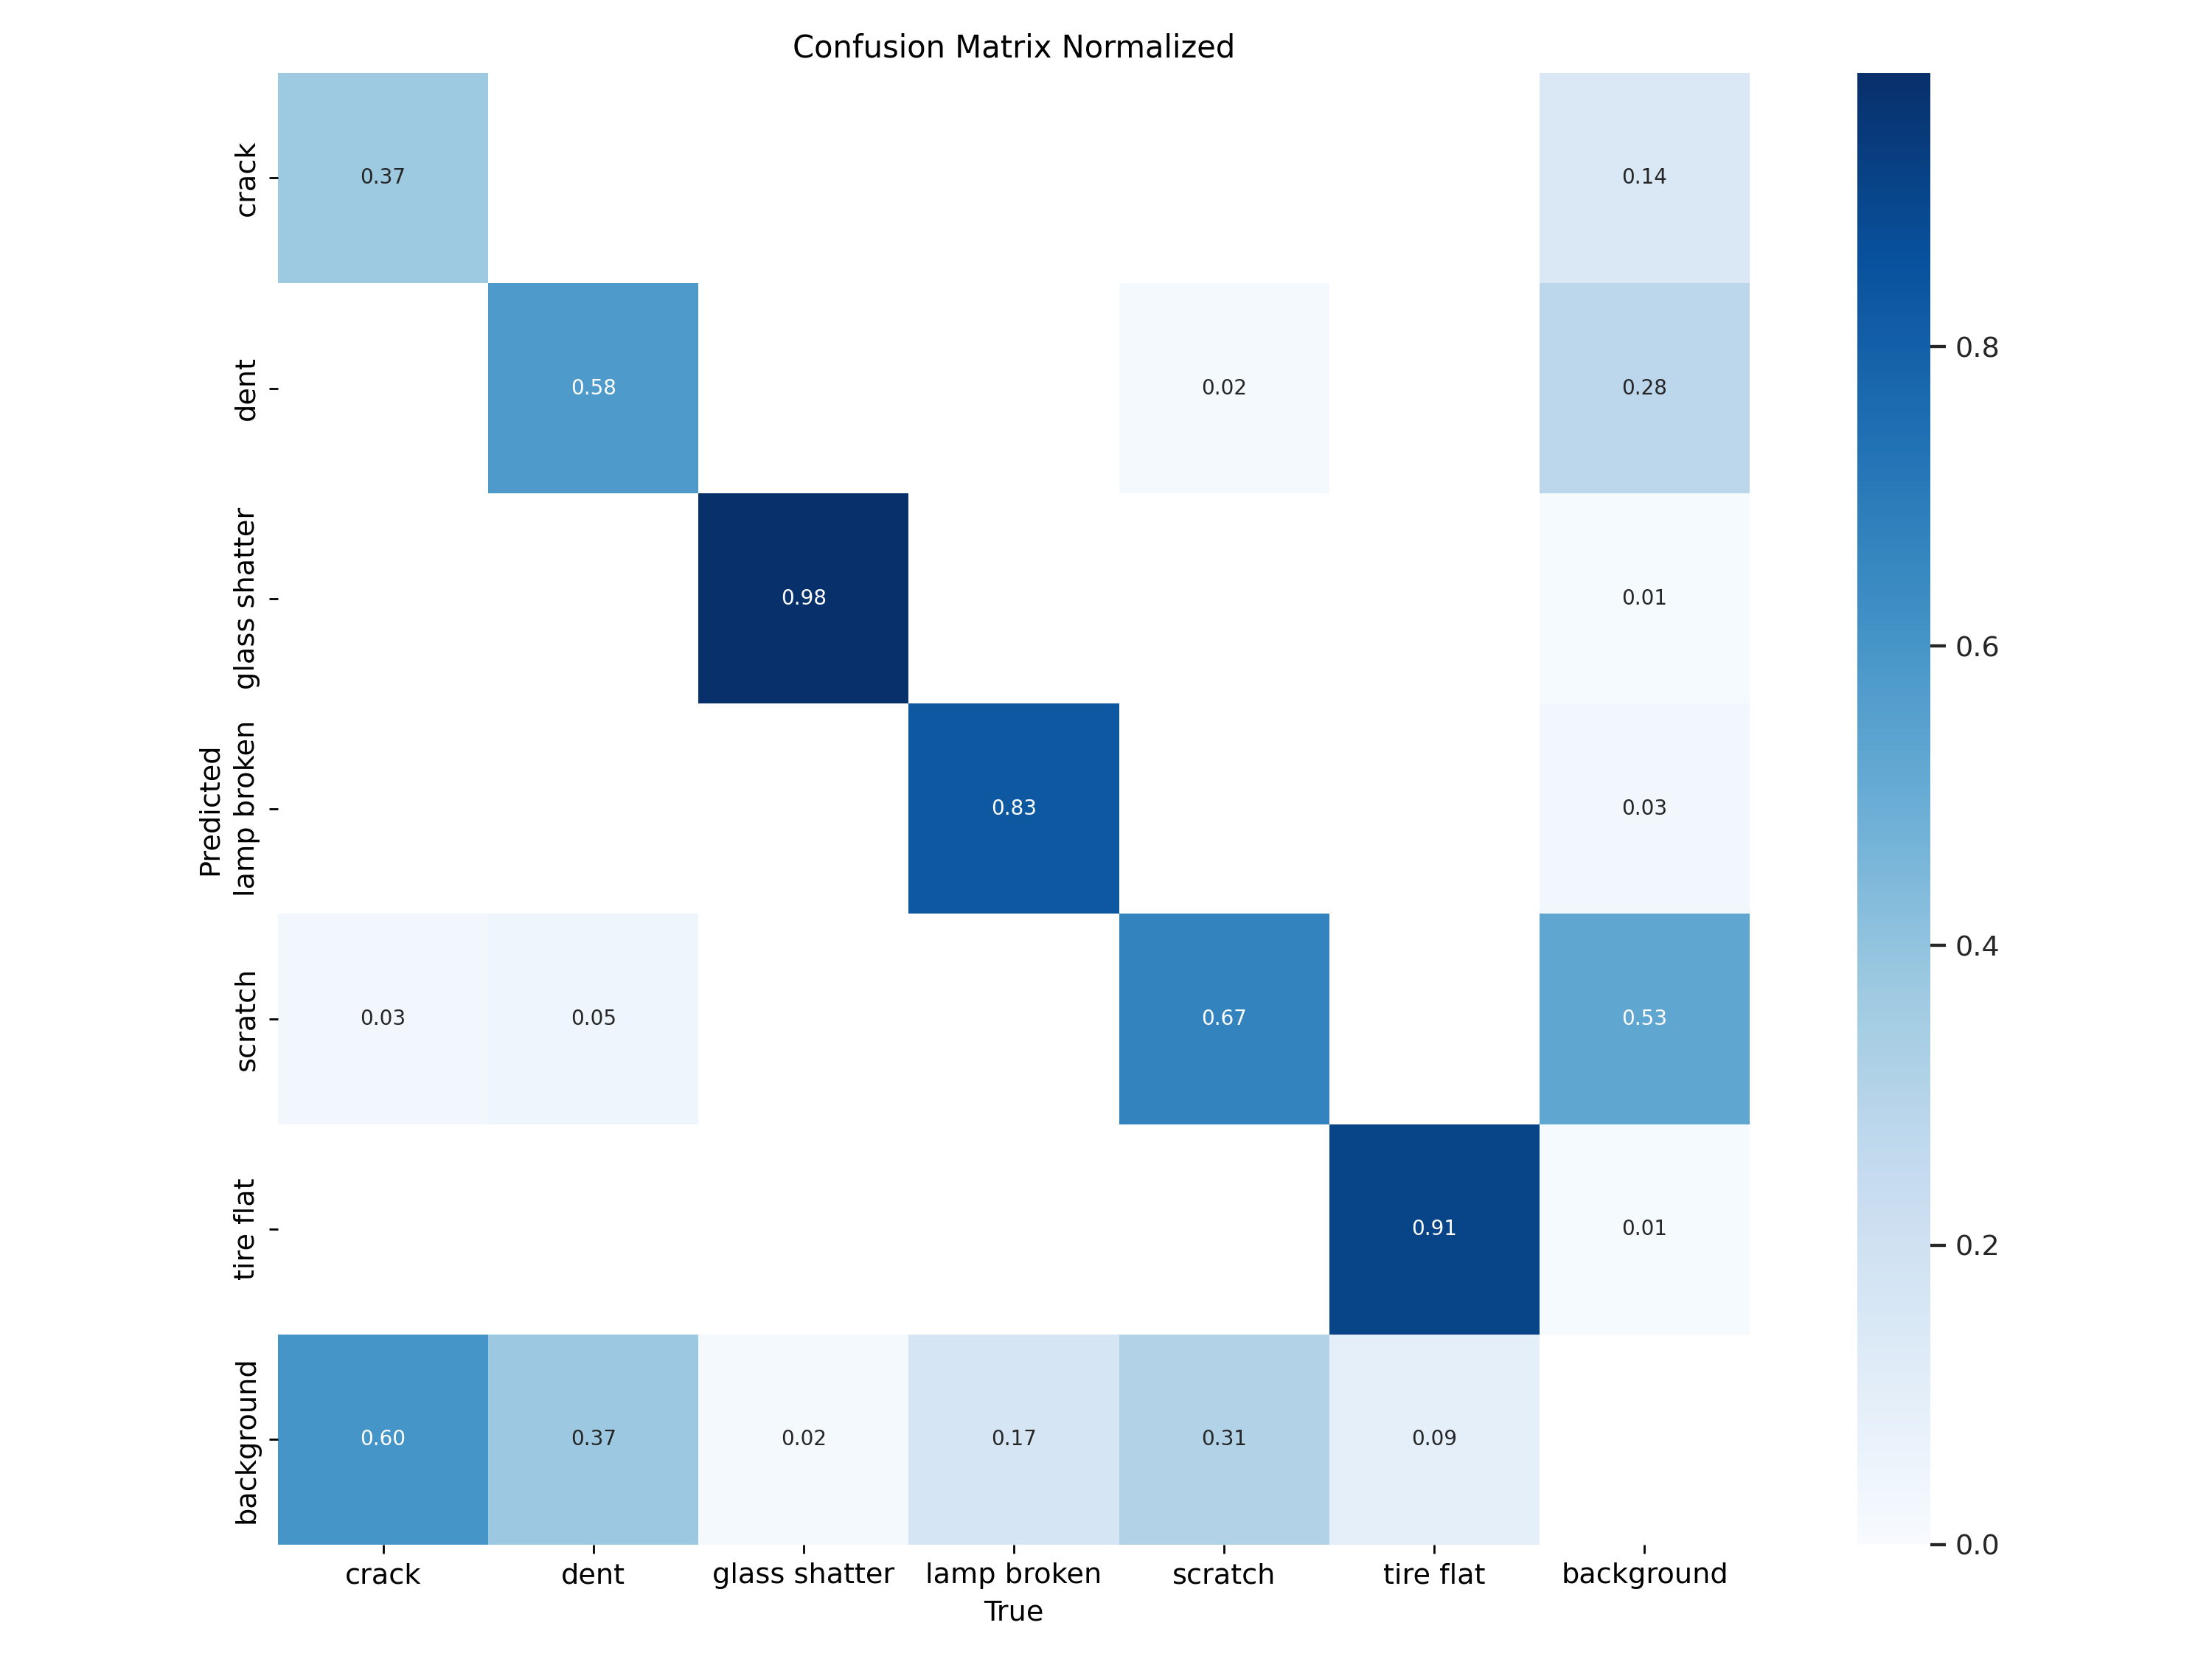

In [10]:
Image(filename='/content/drive/MyDrive/damage_segmentation_yolo/runs/segment/val/confusion_matrix_normalized.png', width=600)

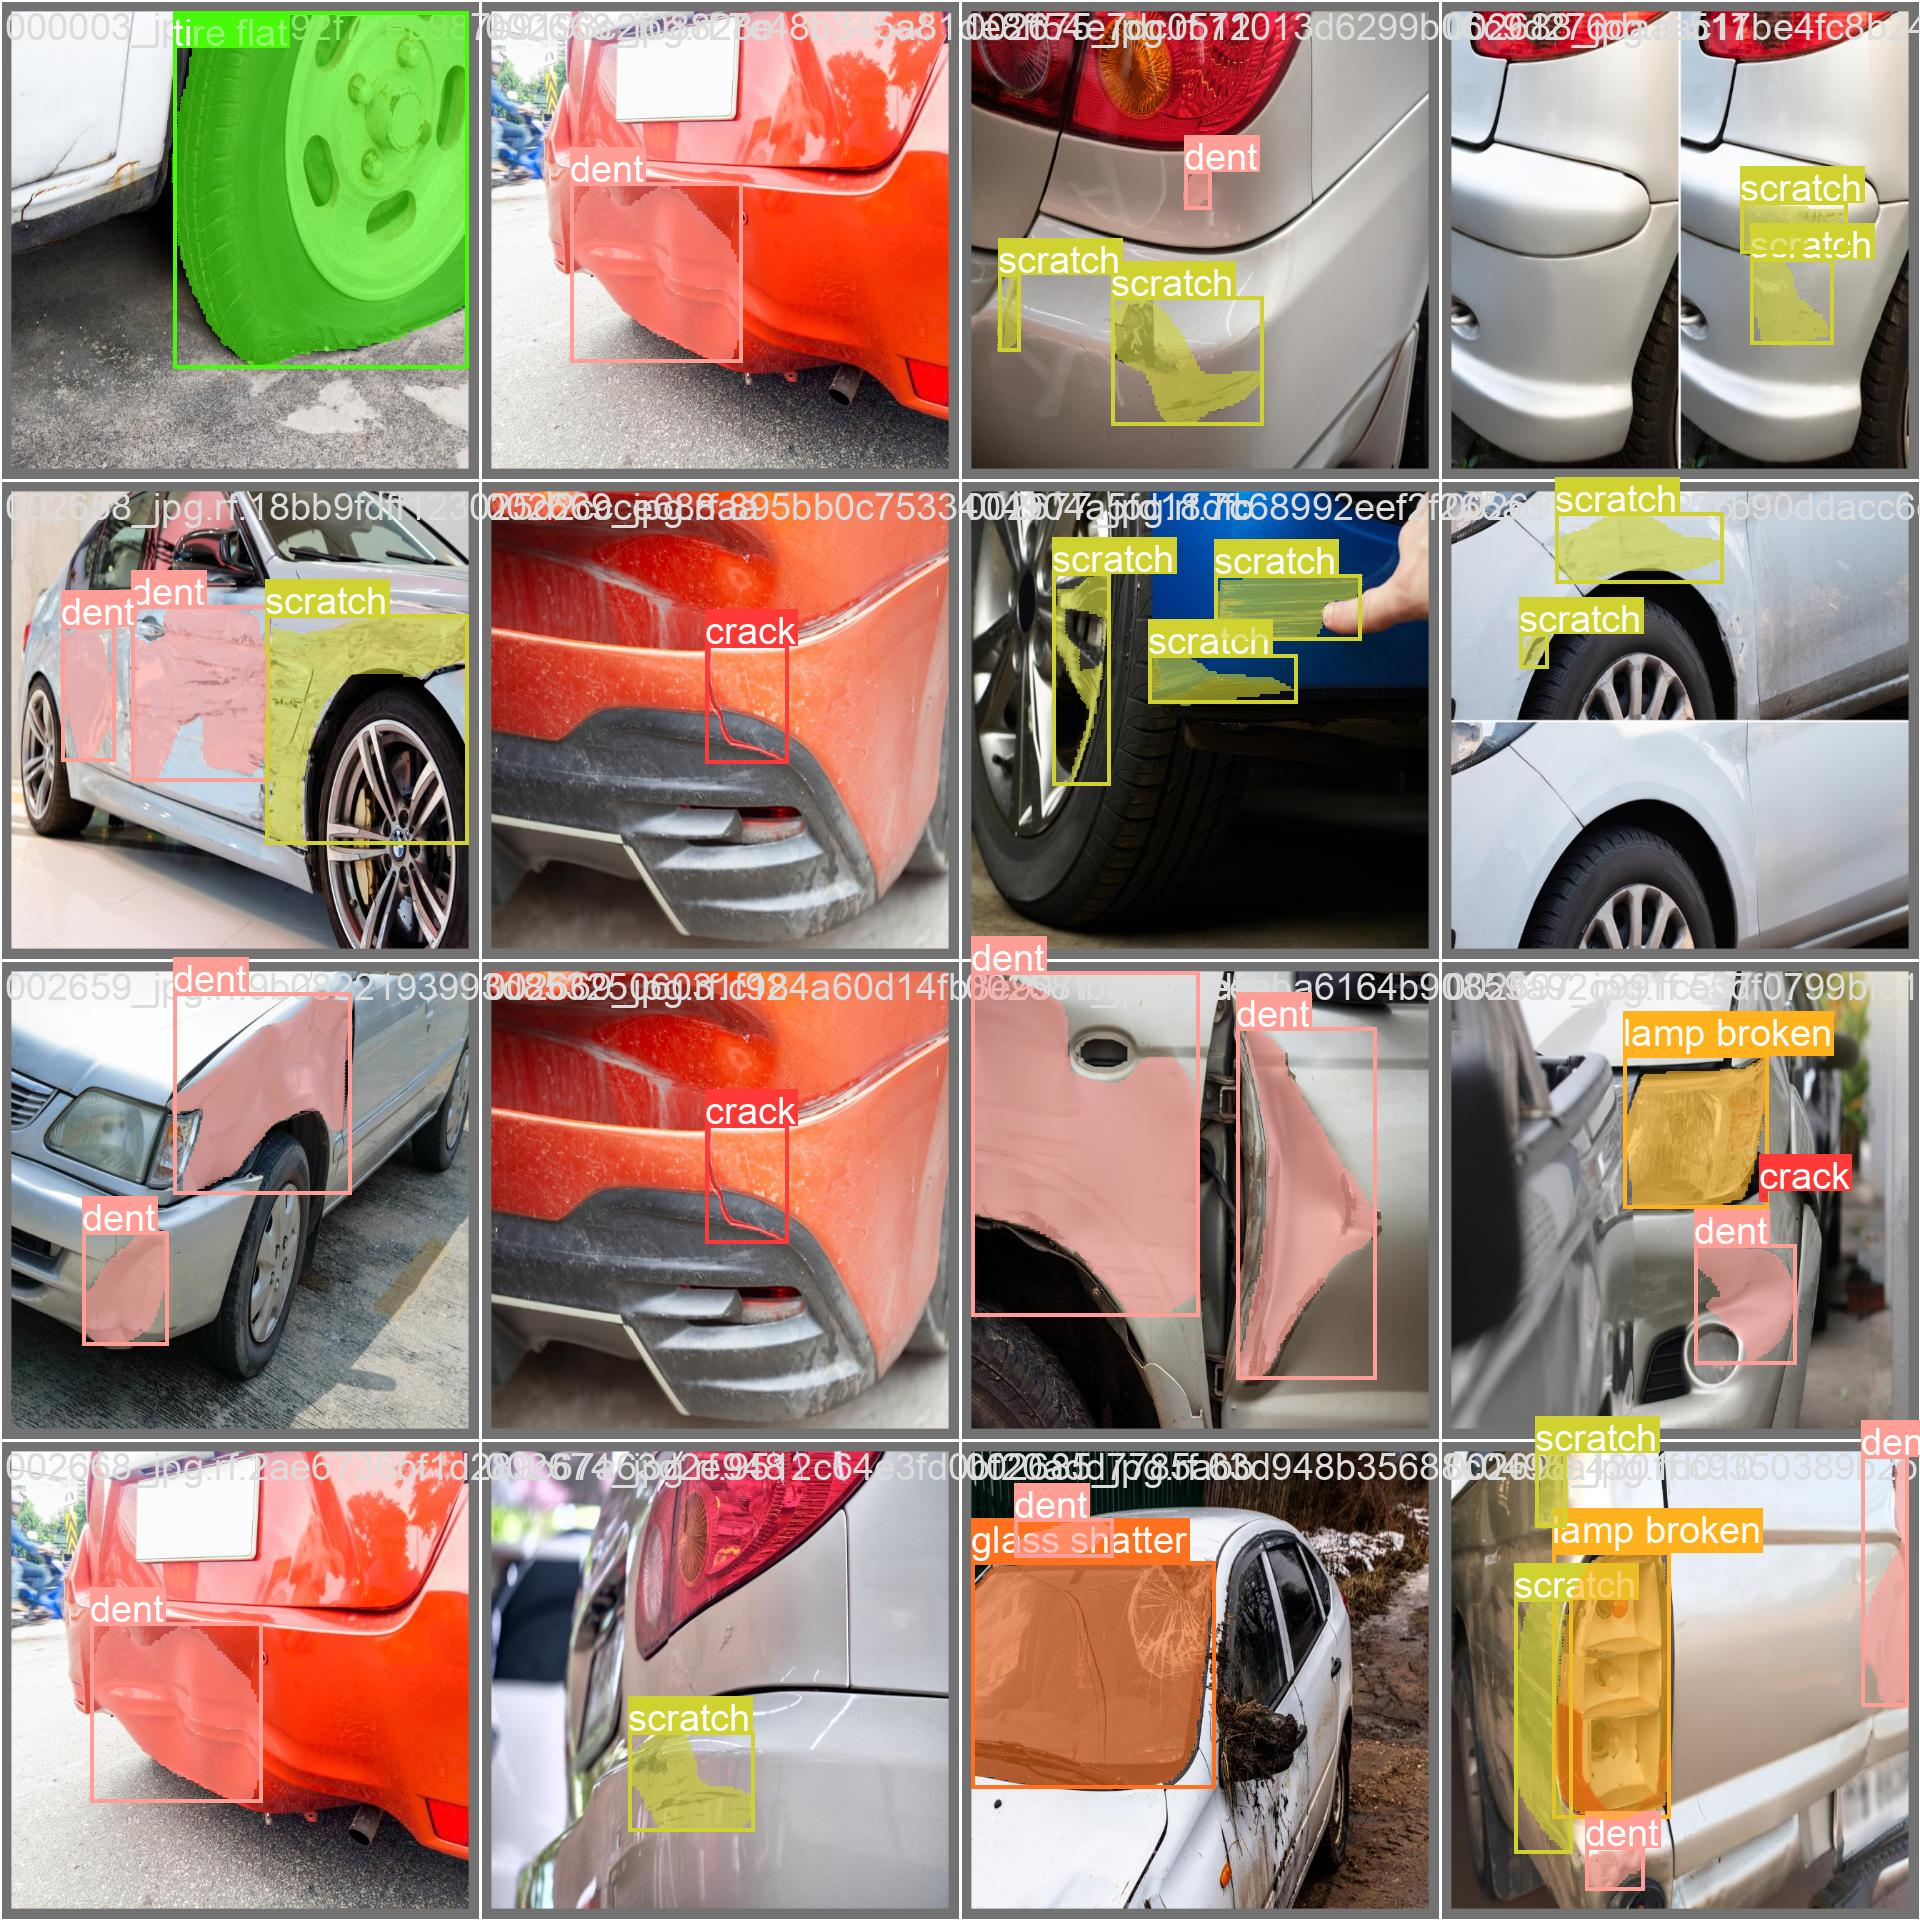

In [12]:
Image(filename='/content/drive/MyDrive/damage_segmentation_yolo/runs/segment/val/val_batch0_labels.jpg')

# **Inference**

In [20]:
!yolo segment predict model="/content/drive/MyDrive/damage_segmentation_yolo/runs/segment/train/weights/best.pt" source='/content/car-2/train/images/000043_jpg.rf.23216f6cf45a8b3f3b334c1f27f77523.jpg'

Ultralytics YOLOv8.1.3 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11781922 parameters, 0 gradients, 42.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/car-2/train/images/000043_jpg.rf.23216f6cf45a8b3f3b334c1f27f77523.jpg: 640x640 5 scratchs, 28.5ms
Speed: 6.2ms preprocess, 28.5ms inference, 1072.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


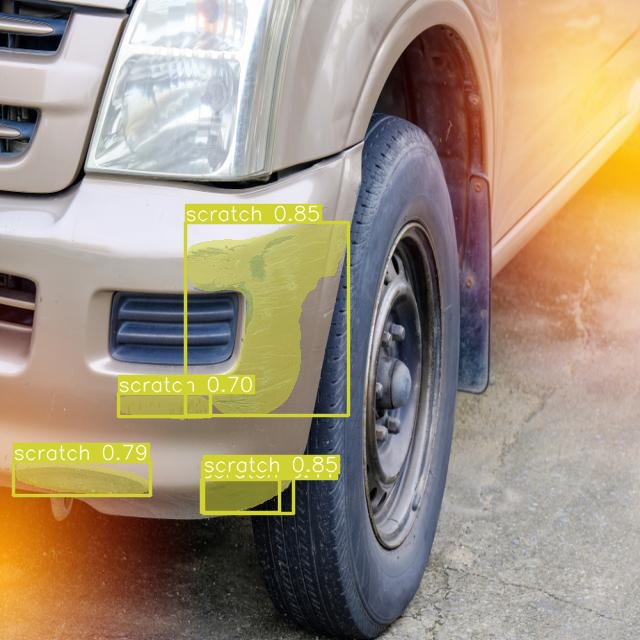

In [21]:
Image(filename="/content/drive/MyDrive/damage_segmentation_yolo/runs/segment/predict4/000043_jpg.rf.23216f6cf45a8b3f3b334c1f27f77523.jpg")

In [22]:
!yolo segment predict model="/content/drive/MyDrive/damage_segmentation_yolo/runs/segment/train/weights/best.pt" source='/content/car-2/test/images/000163_jpg.rf.cb936718153e02fe595fac7e57b921d8.jpg'

Ultralytics YOLOv8.1.3 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11781922 parameters, 0 gradients, 42.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/car-2/test/images/000163_jpg.rf.cb936718153e02fe595fac7e57b921d8.jpg: 640x640 1 crack, 1 dent, 21.0ms
Speed: 3.0ms preprocess, 21.0ms inference, 660.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict


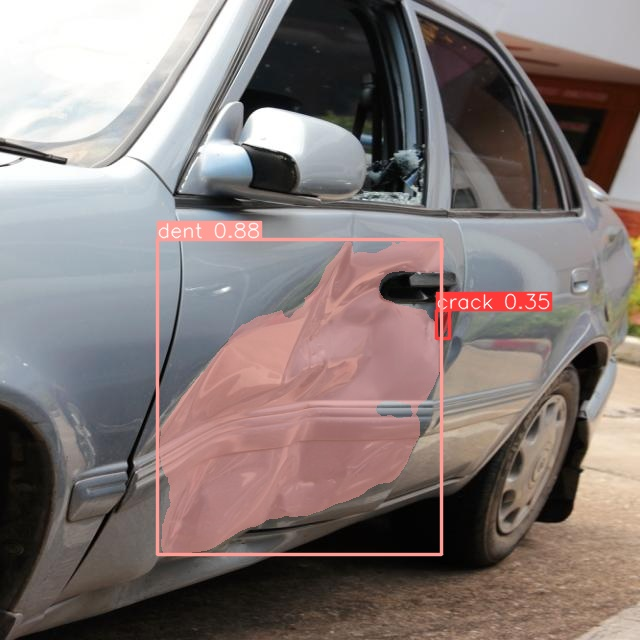

In [23]:
Image(filename='/content/drive/MyDrive/damage_segmentation_yolo/runs/segment/predict5/000163_jpg.rf.cb936718153e02fe595fac7e57b921d8.jpg')